# Predicting The Costs Of Used Cars - Hackathon By Imarticus Learning

FEATURES:

    Name: The brand and model of the car.
    Location: The location in which the car is being sold or is available for purchase.
    Year: The year or edition of the model.
    Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.
    Fuel_Type: The type of fuel used by the car.
    Transmission: The type of transmission used by the car.
    Owner_Type: Whether the ownership is Firsthand, Second hand or other.
    Mileage: The standard mileage offered by the car company in kmpl or km/kg
    Engine: The displacement volume of the engine in cc.
    Power: The maximum power of the engine in bhp.
    Seats: The number of seats in the car.
    New_Price: The price of a new car of the same model.
    Price: The price of the used car in INR Lakhs.

### Import libraries

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

### Import datasets

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')

In [3]:
train.shape, test.shape

((6019, 13), (1234, 12))

### Data exploration

In [4]:
train.duplicated().sum(), test.duplicated().sum()

(0, 1)

In [5]:
train.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [7]:
train.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [8]:
train.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

### Data pre-processing

In [9]:
train = train[train['Kilometers_Driven'] < 700000]
train = train[train['Kilometers_Driven'] > 999]   

In [10]:
train = train[train['Fuel_Type'] != 'Electric']
len(train)

6012

In [11]:
train = train[train['Name'] != 'Ambassador Classic Nova Diesel']
train = train[train['Name'] != 'Lamborghini Gallardo Coupe']
train = train[train['Name'] != 'Force One LX 4x4']
train = train[train['Name'] != 'Force One LX ABS 7 Seating']
train = train[train['Name'] != 'Smart Fortwo CDI AT']
len(train)

6006

In [12]:
df = train.append(test, ignore_index=True, sort=False)

In [13]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [14]:
df['Car_Age'] = 2019 - df['Year']

In [15]:
df['Mileage'] = df['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)

In [16]:
df['Engine'] = df['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)

In [17]:
df['Power'] = df['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)

In [18]:
df['Seats'] = df['Seats'].fillna(5)

In [19]:
df['New_Price'] = df['New_Price'].fillna('-1 Lakhs').apply(lambda x: x.split(' ')[0]) 
df['New_Price'] = df['New_Price'].astype(float).replace(-1, np.nan)

In [20]:
df['Year'] = df['Year'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner_Type'] = df['Owner_Type'].astype('category')

In [21]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                  46
Seats                   0
New_Price            6236
Price                1234
Car_Age                 0
dtype: int64

In [22]:
df['Car_Brand1'] = df['Name'].apply(lambda x: ' '.join(x.split(' ')[:2]))

df['Engine'] = df.groupby(['Car_Brand1']).transform(lambda x: x.fillna(x.median()))['Engine']
df['Power'] = df.groupby(['Car_Brand1']).transform(lambda x: x.fillna(x.median()))['Power']
df['New_Price'] = df.groupby(['Car_Brand1']).transform(lambda x: x.fillna(x.mean()))['New_Price']

In [23]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            1504
Price                1234
Car_Age                 0
Car_Brand1              0
dtype: int64

In [24]:
df['Car_Brand2'] = df['Name'].apply(lambda x: x.split(' ')[0])

df['New_Price'] = df.groupby(['Car_Brand2']).transform(lambda x: x.fillna(x.mean()))['New_Price']

In [25]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price             156
Price                1234
Car_Age                 0
Car_Brand1              0
Car_Brand2              0
dtype: int64

In [26]:
def aggregate_functions(df):        
    
    agg_func = {
        'Location' : ['count'],
        'Mileage' : ['mean'],
        'Power' : ['mean'],
        'Engine' : ['mean'] }
    
    agg_df = df.groupby(['Car_Brand1']).agg(agg_func)
    agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
    agg_df.reset_index(inplace=True)
    
    agg_df = pd.merge(df, agg_df, on='Car_Brand1', how='left')
    
    return agg_df

In [27]:
df = aggregate_functions(df)

In [28]:
df.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Car_Brand1,Car_Brand2,Location_count,Mileage_mean,Power_mean,Engine_mean
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,5.439318,1.75,9,Maruti Wagon,Maruti,177,20.912373,66.201808,1014.056497


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf1 = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 1), max_df=1.0, min_df=2, binary=True)
df_name = tf1.fit_transform(df['Name'])
df_name = pd.DataFrame(data=df_name.toarray(), columns=tf1.get_feature_names())

df = pd.concat([df, df_name], axis=1) 

In [30]:
df.drop(['Name','Car_Brand1','Car_Brand2'], axis=1, inplace=True)

In [31]:
train_df = df[df['Price'].isnull()!=True]
test_df = df[df['Price'].isnull()==True]
test_df.drop('Price', axis=1, inplace=True)

In [32]:
train_df.shape, test_df.shape

((6006, 670), (1234, 669))

In [33]:
train_df['Price'] = np.log1p(train_df['Price'])

### Train test split

In [34]:
X = train_df.drop(labels=['Price'], axis=1)
y = train_df['Price'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [35]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((4504, 669), (4504,), (1502, 669), (1502,))

### Build the model

In [36]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error

In [37]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 1000,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65,
         }

lgbm = lgb.train(params=param,
                 verbose_eval=100,
                 early_stopping_rounds=50,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's rmse: 0.161074
[200]	valid_0's rmse: 0.153335
[300]	valid_0's rmse: 0.150883
[400]	valid_0's rmse: 0.14974
[500]	valid_0's rmse: 0.149047
Early stopping, best iteration is:
[500]	valid_0's rmse: 0.149047
RMSLE: 0.1490468988971752


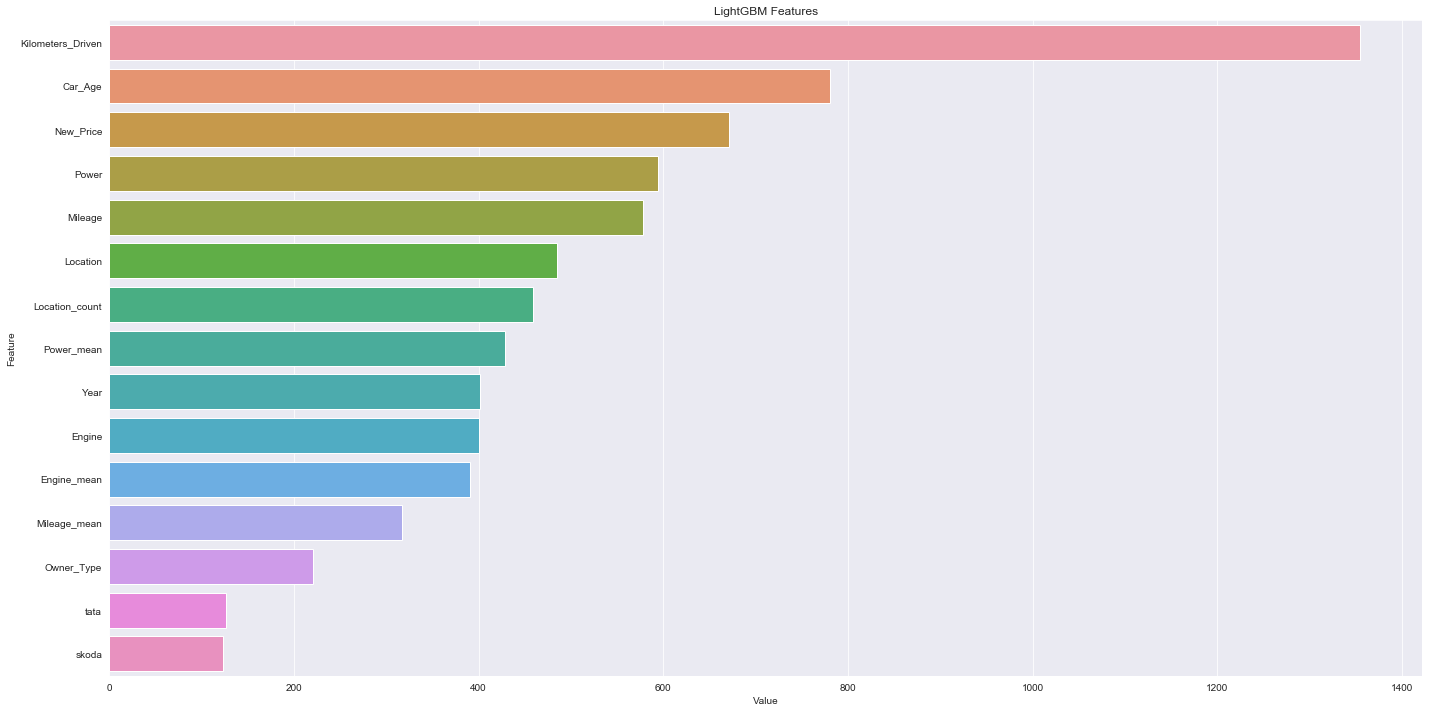

In [38]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:15], 
                           columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

### Predict on test set

In [39]:
Xtest = test_df

In [40]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=15, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 1000,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65
         }

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=50)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))

    errlgb.append(sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))
    p = lgbm.predict(Xtest)
    
    y_pred_totlgb.append(p)

RMSLE LGBM:  0.12592288410413363
RMSLE LGBM:  0.12834891488731617
RMSLE LGBM:  0.11645801214951844
RMSLE LGBM:  0.12620720243806346
RMSLE LGBM:  0.11826384568882042
RMSLE LGBM:  0.1424869889073636
RMSLE LGBM:  0.20411278008061975
RMSLE LGBM:  0.103502604793448
RMSLE LGBM:  0.13660550298952415
RMSLE LGBM:  0.1296016144204825
RMSLE LGBM:  0.11033051817729324
RMSLE LGBM:  0.1118180193232434
RMSLE LGBM:  0.11952170542423937
RMSLE LGBM:  0.12657572795773187
RMSLE LGBM:  0.1472177605927138


In [41]:
np.mean(errlgb) 

0.1297982721289675

In [42]:
lgbm_final = np.expm1(np.mean(y_pred_totlgb,0))

In [43]:
df_sub = pd.DataFrame(data=lgbm_final, columns=['Price'])
writer = pd.ExcelWriter('Output.xlsx', engine='xlsxwriter')
df_sub.to_excel(writer,sheet_name='Sheet1', index=False)
writer.save()

In [44]:
df_sub.shape

(1234, 1)

In [45]:
df_sub.head()

,Price
0,2.593238
1,2.956951
2,17.088192
3,3.881875
4,4.511628
